In [1]:
#Declaring the variables
import pandas as pd
import prophet as prophet
import numpy as numpy
import matplotlib.pyplot as mplot
import seaborn as sb
import random
from prophet import Prophet

In [2]:
#Print the dataset as a test
#Insert the location of the dataset below (e.g. location.csv)
df = pd.read_csv('F:\IndividualProject\DATATEST.csv', error_bad_lines = False) #, parse_dates=['Date'])
df.head(100)

C:\Users\ATuck\AppData\Local\Temp\ipykernel_21236\3684695790.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('F:\IndividualProject\DATATEST.csv', error_bad_lines = False) #, parse_dates=['Date'])


,ID1,ID2,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53928,4871980,HM470742,02/04/2004 09:00:00 AM,072XX S GREEN ST,1195,DECEPTIVE PRACTICE,FINAN EXPLOIT-ELDERLY/DISABLED,RESIDENCE,False,...,17.0,68.0,11,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
96,54175,4872408,HM486511,01/01/2004 12:00:00 AM,054XX S MARSHFIELD AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,APARTMENT,False,...,16.0,61.0,02,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
97,54419,4752685,HM355963,11/01/2003 12:00:00 PM,070XX S TALMAN AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,...,18.0,66.0,06,1159921.0,1857951.0,2003,04/15/2016 08:55:02 AM,41.765924,-87.689395,"(41.765923753, -87.689395237)"
98,54575,4873027,HM487247,01/01/2002 01:00:00 AM,037XX W PALMER ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,...,35.0,22.0,02,NaN,NaN,2002,08/17/2015 03:03:40 PM,NaN,NaN,NaN


In [13]:
#Converting the Date to the Datetime format for ease of use
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df.Date

Date
2004-01-01 00:01:00   2004-01-01 00:01:00
2003-03-01 00:00:00   2003-03-01 00:00:00
2004-06-20 11:00:00   2004-06-20 11:00:00
2004-12-30 20:00:00   2004-12-30 20:00:00
2003-05-01 01:00:00   2003-05-01 01:00:00
                              ...        
2003-01-01 00:01:00   2003-01-01 00:01:00
2004-09-09 00:00:00   2004-09-09 00:00:00
2002-09-04 00:01:00   2002-09-04 00:01:00
2004-11-01 23:00:00   2004-11-01 23:00:00
2002-01-30 00:01:00   2002-01-30 00:01:00
Name: Date, Length: 999, dtype: datetime64[ns]

In [14]:
#Index the datetimes
df.index = pd.DatetimeIndex(df.Date)

In [24]:
#counts all the primary types and displays no of each
df['Primary Type'].value_counts()

THEFT                               606
OFFENSE INVOLVING CHILDREN           99
DECEPTIVE PRACTICE                   74
NARCOTICS                            65
SEX OFFENSE                          43
CRIM SEXUAL ASSAULT                  33
OTHER OFFENSE                        29
MOTOR VEHICLE THEFT                  16
BATTERY                               9
CRIMINAL DAMAGE                       6
WEAPONS VIOLATION                     3
PROSTITUTION                          3
BURGLARY                              3
GAMBLING                              2
INTERFERENCE WITH PUBLIC OFFICER      2
STALKING                              1
ARSON                                 1
PUBLIC PEACE VIOLATION                1
ASSAULT                               1
LIQUOR LAW VIOLATION                  1
CRIMINAL TRESPASS                     1
Name: Primary Type, dtype: int64

In [25]:
#indexes said primary types
order_data = df['Primary Type'].value_counts().index

<Axes: xlabel='count', ylabel='Primary Type'>

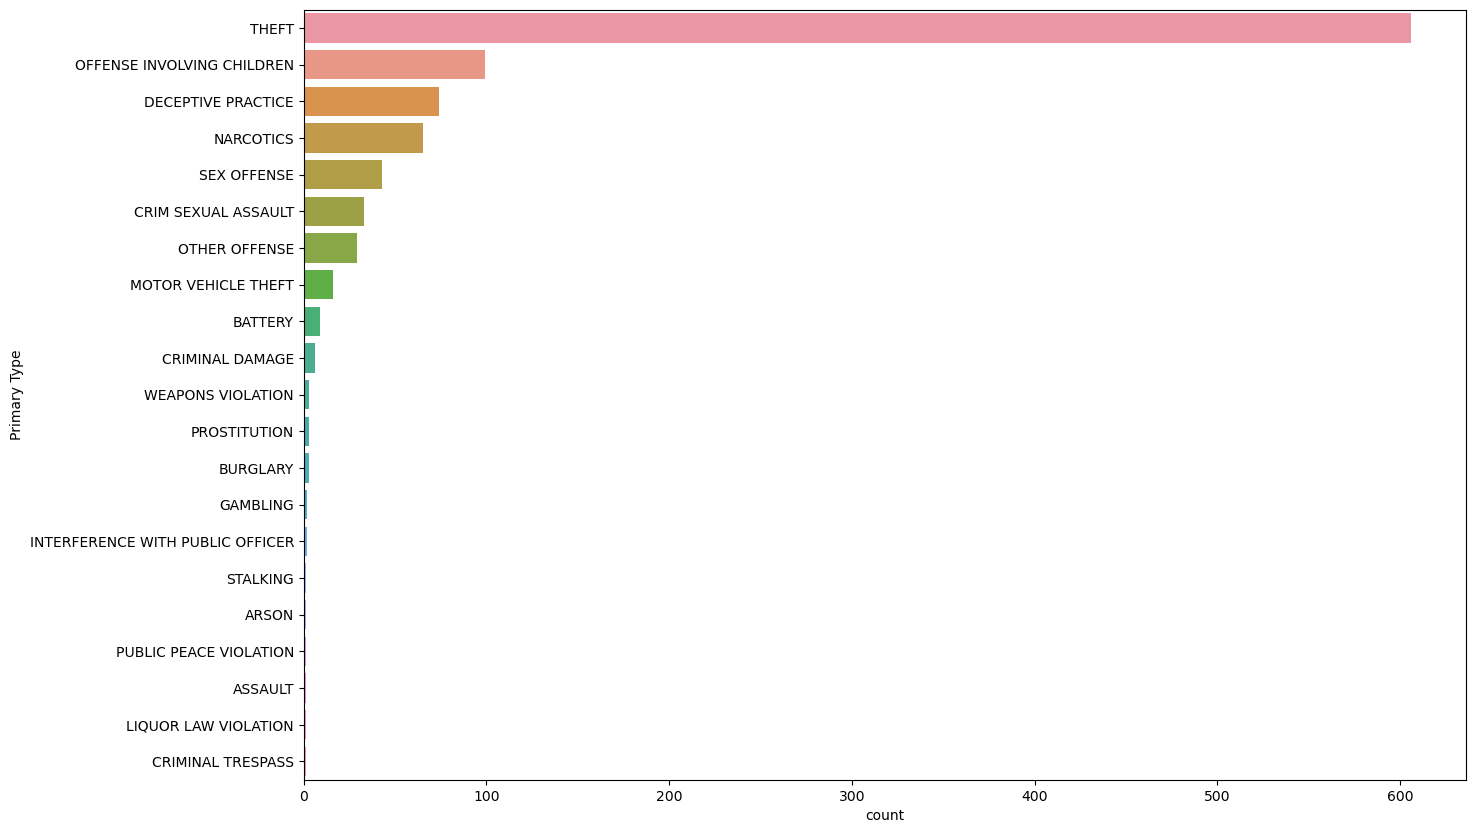

In [26]:
#plots all the previously said primary types to display it visually
mplot.figure(figsize=(15,10))
sb.countplot(y='Primary Type', data=df, order = order_data)

In [27]:
#counts all the crime that occurs within a specific year
df.resample('Y').size()

Date
2001-12-31    134
2002-12-31    170
2003-12-31    269
2004-12-31    426
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'No of Crimes')

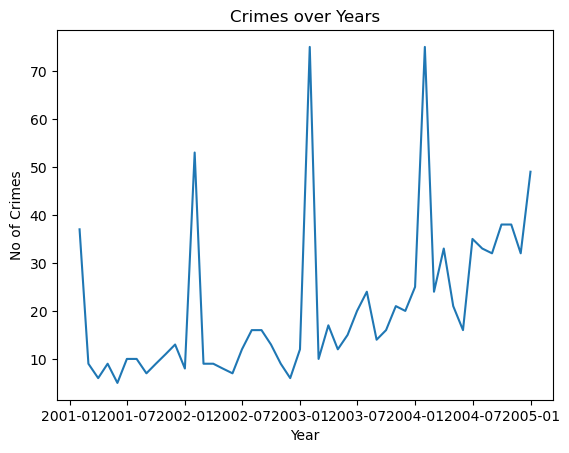

In [29]:
mplot.plot(df.resample('M').size())
mplot.title('Crimes over Years')
mplot.xlabel('Year')
mplot.ylabel('No of Crimes')